## ANOVA in Python

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the iris dataset
iris = sns.load_dataset("iris")
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [18]:
# Perform one-way ANOVA
model = ols('sepal_length ~ C(species)', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(species),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


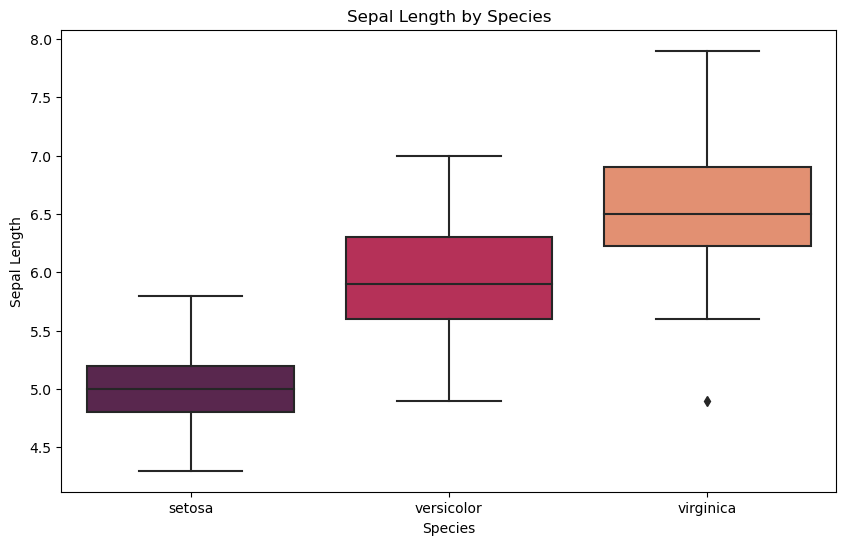

In [19]:
# Plotting the data using seaborn with Viridis color palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris, palette="rocket")
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

In [21]:
# Post-Hoc test using Tukey's HSD
tukey = pairwise_tukeyhsd(endog=iris['sepal_length'], groups=iris['species'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


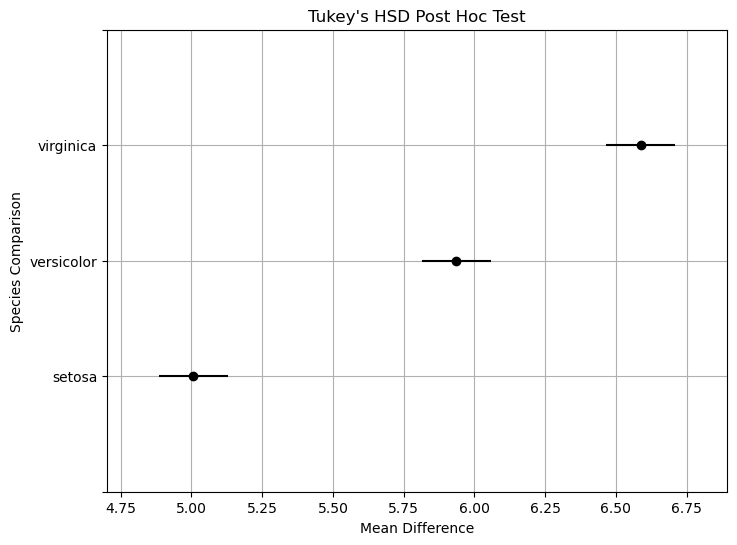

In [23]:
# Plotting the post hoc test results
tukey_plot = tukey.plot_simultaneous(comparison_name=None, figsize=(8, 6))
plt.title("Tukey's HSD Post Hoc Test")
plt.xlabel('Mean Difference')
plt.ylabel('Species Comparison')
plt.grid(True)
plt.show()